<a href="https://colab.research.google.com/github/vishalthorat03/Python-practice/blob/Data-Science-and-Analytics/imdb_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 [==============================] - 0s 0us/step
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 10001 entries, 1 to Label
dtypes: float32(1), float64(10000)
memory usage: 1.9 GB
None
Categorical Summary:
             1        2             3        4             5             6  \
count  25000.0  25000.0  25000.000000  25000.0  25000.000000  25000.000000   
mean       0.0      1.0      0.973000      0.0      0.991720      0.966560   
std        0.0      0.0      0.162087      0.0      0.090619      0.179786   
min        0.0      1.0      0.000000      0.0      0.000000      0.000000   
25%        0.0      1.0      1.000000      0.0      1.000000      1.000000   
50%        0.0      1.0      1.000000      0.0      1.000000      1.000000   
75%        0.0      1.0      1.000000      0.0      1.000000      1.000000   
max        0.0      1.0      1.000000      0.0      1.000000      1.000000   

                  

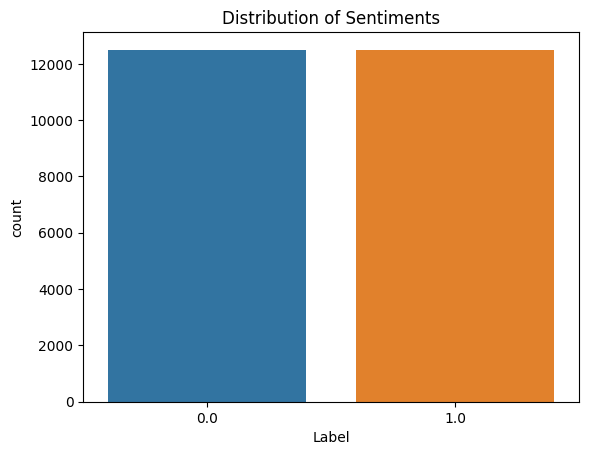

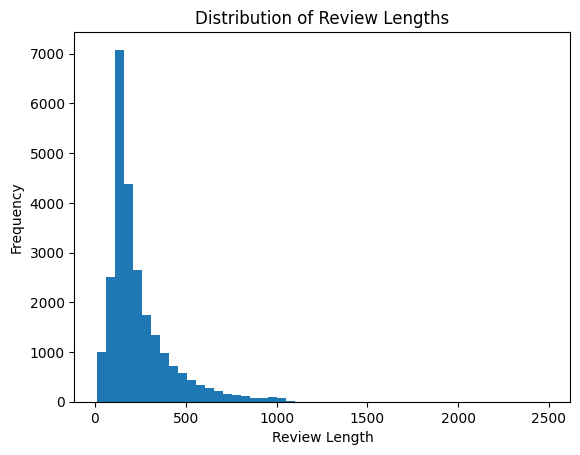

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import imdb
import pandas as pd

# Load the IMDb dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Combine training and testing data for exploratory data analysis (EDA)
data = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Function to vectorize sequences (one-hot encoding)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

# Vectorize the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Convert labels to float32
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Create a DataFrame for EDA
df = pd.DataFrame(data=x_train, columns=range(1, 10001))
df['Label'] = y_train

# Exploratory Data Analysis (EDA)
print("Dataset Information:")
print(df.info())

# Drop missing and null values
df.dropna(inplace=True)

# Visualize dataset in categorical and numerical form
print("Categorical Summary:")
print(df.describe(include='all'))

# Visualize sentiments
sns.countplot(x='Label', data=df)
plt.title('Distribution of Sentiments')
plt.show()

# Review length of reviews
review_lengths = [len(review) for review in train_data]
plt.hist(review_lengths, bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


Code Information:

1. We vectorize the sequences using one-hot encoding to create a binary matrix representation of the data.

2. We create a DataFrame for exploratory data analysis (EDA) and drop any

3. Categorical and numerical summaries are printed.

4. Sentiments are visualized using a countplot.

5. The distribution of review lengths is visualized using a histogram.









In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense

# Define the model
model = Sequential()
model.add(Embedding(10000, 128, input_length=10000))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
results = model.evaluate(x_test, y_test)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])


Epoch 1/10
625/625 [==============================] - 28s 37ms/step - loss: 0.6934 - accuracy: 0.5077 - val_loss: 0.6925 - val_accuracy: 0.5218
Epoch 2/10
625/625 [==============================] - 23s 37ms/step - loss: 0.6927 - accuracy: 0.5118 - val_loss: 0.6908 - val_accuracy: 0.5304
Epoch 3/10
625/625 [==============================] - 24s 39ms/step - loss: 0.6919 - accuracy: 0.5206 - val_loss: 0.6901 - val_accuracy: 0.5318
Epoch 4/10
625/625 [==============================] - 23s 36ms/step - loss: 0.6911 - accuracy: 0.5246 - val_loss: 0.6902 - val_accuracy: 0.5278
Epoch 5/10
625/625 [==============================] - 24s 38ms/step - loss: 0.6904 - accuracy: 0.5278 - val_loss: 0.6885 - val_accuracy: 0.5356
Epoch 6/10
625/625 [==============================] - 23s 36ms/step - loss: 0.6899 - accuracy: 0.5340 - val_loss: 0.6883 - val_accuracy: 0.5376
Epoch 7/10
625/625 [==============================] - 24s 38ms/step - loss: 0.6890 - accuracy: 0.5347 - val_loss: 0.6886 - val_accuracy:

This defines a CNN architecture for sentiment analysis. It uses an embedding layer to convert word indices into dense vectors, followed by two convolutional layers with max pooling. The output is then passed through a global max pooling layer and a dense layer with a sigmoid activation function for binary classification.

782/782 [==============================] - 8s 10ms/step


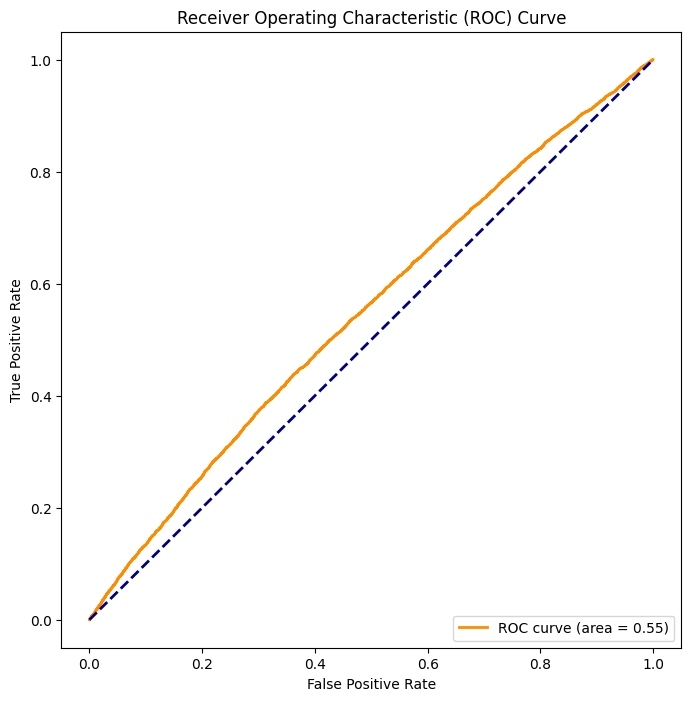

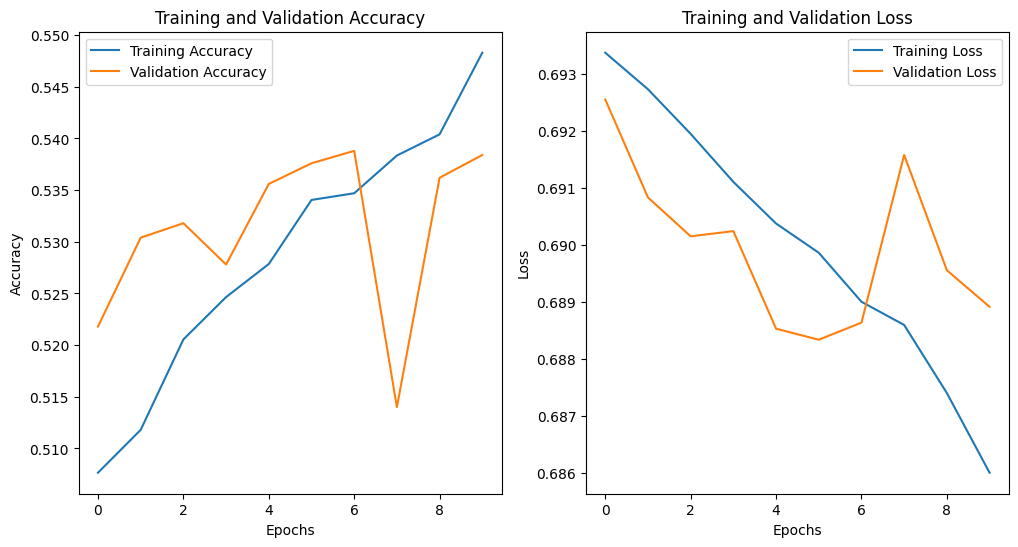

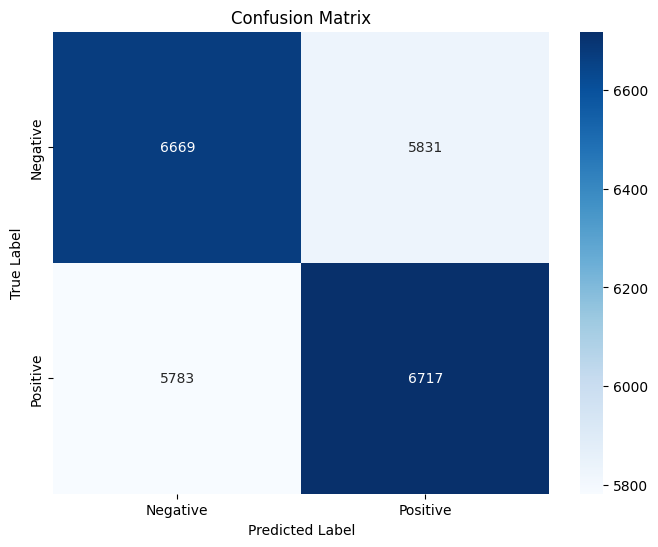

Classification Report:
               precision    recall  f1-score   support

         0.0       0.54      0.53      0.53     12500
         1.0       0.54      0.54      0.54     12500

    accuracy                           0.54     25000
   macro avg       0.54      0.54      0.54     25000
weighted avg       0.54      0.54      0.54     25000



In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions on test data
y_pred = model.predict(x_test)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Training Curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix and Heatmap
threshold = 0.5  # Adjust this threshold based on your problem

y_pred_binary = (y_pred > threshold).astype(int)
conf_mat = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_binary))


This code snippet includes visualization for the ROC curve, training and validation curves, confusion matrix, and a classification report. Adjust the threshold in y_pred_binary based on your specific problem requirements. The ROC curve, training curves, and confusion matrix provide insights into the model's performance. The classification report provides precision, recall, and F1-score for each class.

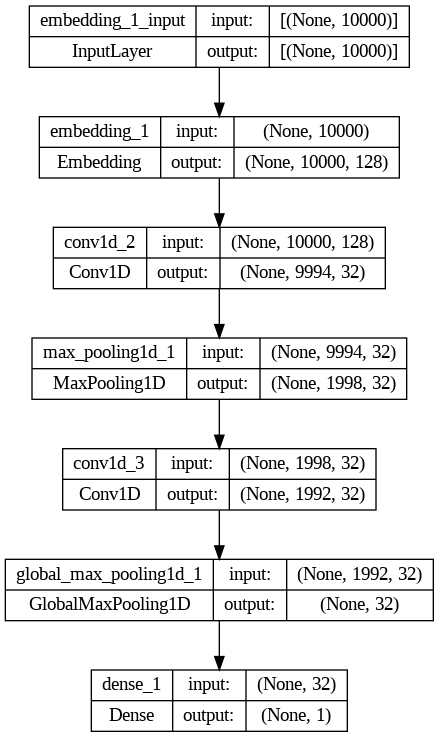

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
